# DBSCAN

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

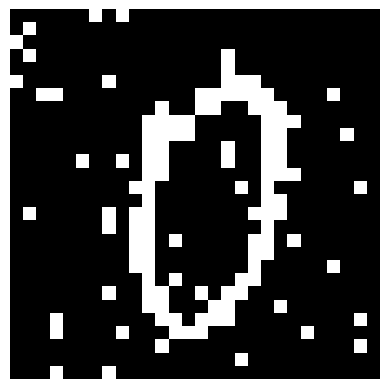

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

noisy_img = np.loadtxt("/content/noisy_mnist.txt")

plt.imshow(noisy_img, cmap='gray')
plt.axis('off')


In [19]:
n = 28
Y,X = np.meshgrid(np.arange(28), np.arange(28))

dat = np.stack((Y.ravel(),
                X.ravel(),
                noisy_img.ravel()), axis= 1)

dat.shape
dat[:10]

array([[ 0.,  0., -1.],
       [ 1.,  0., -1.],
       [ 2.,  0., -1.],
       [ 3.,  0., -1.],
       [ 4.,  0., -1.],
       [ 5.,  0., -1.],
       [ 6.,  0.,  1.],
       [ 7.,  0., -1.],
       [ 8.,  0.,  1.],
       [ 9.,  0., -1.]])

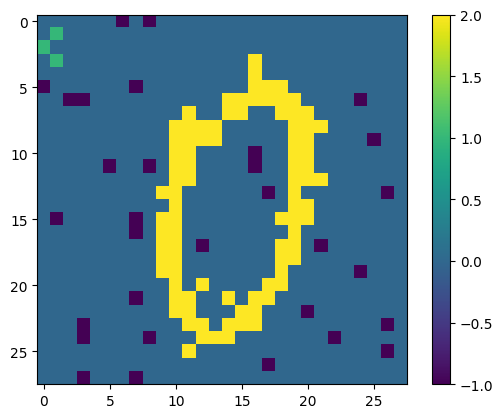

In [79]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1.5 , min_samples=3)
dbscan.fit(dat)


labels_img = dbscan.labels_.reshape(28,28)
plt.imshow(labels_img)
plt.colorbar()

In [81]:
# Helper function to be used with HW-4 of DSC345/540 (Winter 2025)

def replace_intensity(img, i, j, width):
    '''Replace intensity of the (i,j)-th pixel with the majority intensity
    of a patch of specific width around it'''

    # size of the image
    n,m = img.shape

    # creating a bounding box as the neighborhodd of the pixel
    w = int((width-1)/2)
    i_lb = max(i-w, 0)
    i_ub = min(i+w, n)
    j_lb = max(j-w, 0)
    j_ub = min(j+w, m)
    patch = img[i_lb:i_ub, j_lb:j_ub].ravel()

    # only consider clean pixels in the neighborhood
    patch = patch[patch!=-1]

    # if there exists at least one clean pixel,
    # run the majority voting
    if len(patch)>0:
        vals,cnts = np.unique(patch, return_counts=True)
        return vals[np.argmax(cnts)]
    else:
        # if no clean pixel in the patch,
        # just return the current intensity
        return img[i,j]




width = 5 # width of neighboring patch

# copying the current labels to a different variable
cleaned_labels_img = labels_img.copy()
for i in range(n):
  for j in range(n):
    if labels_img[i,j] == -1:
      cleaned_labels_img[i,j] = replace_intensity(
          labels_img,
          i,
          j,
          width
      )

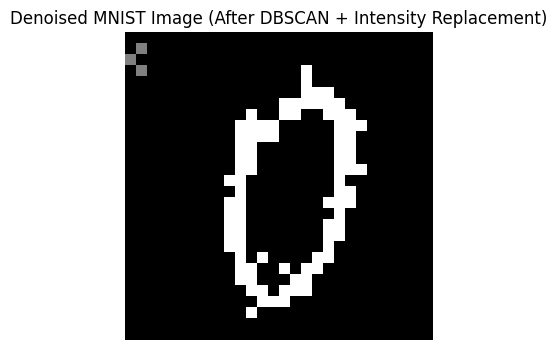

In [84]:
plt.figure(figsize=(4, 4))
plt.imshow(cleaned_labels_img, cmap='gray')
plt.axis('off')
plt.title("Denoised MNIST Image (After DBSCAN + Intensity Replacement)")
plt.show()


# Bayesian Network

In [91]:
import pandas as pd
dat = pd.read_csv("/content/heart_disease.csv")
dat

,Age,Sex,RestBP,Chol,FastingBS,HD
0,52,1,125,212,0,0
1,53,1,140,203,1,0
2,70,1,145,174,0,0
3,61,1,148,203,0,0
4,62,0,138,294,1,0
...,...,...,...,...,...,...
1020,59,1,140,221,0,1
1021,60,1,125,258,0,0
1022,47,1,110,275,0,0
1023,50,0,110,254,0,1


In [97]:
from sklearn.model_selection import train_test_split
randstate = 123
train_df, test_df = train_test_split(dat,test_size=0.2, random_state=randstate)

In [107]:
!pip install -q pgmpy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Create the model using the new class name
model = DiscreteBayesianNetwork([
    ('Age', 'Chol'),
    ('Sex', 'Chol'),
    ('Chol', 'HD'),
    ('RestBP', 'HD'),
    ('FastingBS', 'HD')
])
# Nodes and edges
print("Nodes:", list(model.nodes()))
print("Edges:", list(model.edges()))


# First 5 (conditional) independencies
inds = model.get_independencies()
first5 = "\n".join(str(inds).split("\n")[:5])
print("\nFirst 5 independencies:\n", first5)


Nodes: ['Age', 'Chol', 'Sex', 'HD', 'RestBP', 'FastingBS']
Edges: [('Age', 'Chol'), ('Chol', 'HD'), ('Sex', 'Chol'), ('RestBP', 'HD'), ('FastingBS', 'HD')]

First 5 independencies:
 (Sex ⟂ RestBP)
(HD ⟂ Age | Chol)
(FastingBS ⟂ Chol)
(FastingBS ⟂ Sex)
(FastingBS ⟂ Age)


In [111]:
from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(train_df, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print(cpd)

+---------+------------+
| Age(29) | 0.00487805 |
+---------+------------+
| Age(34) | 0.00731707 |
+---------+------------+
| Age(35) | 0.0134146  |
+---------+------------+
| Age(37) | 0.00731707 |
+---------+------------+
| Age(38) | 0.0121951  |
+---------+------------+
| Age(39) | 0.0097561  |
+---------+------------+
| Age(40) | 0.0097561  |
+---------+------------+
| Age(41) | 0.0329268  |
+---------+------------+
| Age(42) | 0.0268293  |
+---------+------------+
| Age(43) | 0.0219512  |
+---------+------------+
| Age(44) | 0.0378049  |
+---------+------------+
| Age(45) | 0.0268293  |
+---------+------------+
| Age(46) | 0.0207317  |
+---------+------------+
| Age(47) | 0.0158537  |
+---------+------------+
| Age(48) | 0.0256098  |
+---------+------------+
| Age(49) | 0.0158537  |
+---------+------------+
| Age(50) | 0.0195122  |
+---------+------------+
| Age(51) | 0.0317073  |
+---------+------------+
| Age(52) | 0.0487805  |
+---------+------------+
| Age(53) | 0.0256098  |


In [116]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)

q_female_35 = inference.query(variables=['HD'], evidence={'Age': 35, 'Sex': 0})
q_male_35   = inference.query(variables=['HD'], evidence={'Age': 35, 'Sex': 1})

print("Female, Age=35:\n", q_female_35)
print("Male,   Age=35:\n", q_male_35)



q1 = inference.query(variables=['HD'], evidence={'Chol': 172, 'Age': 35, 'Sex': 0})
q2 = inference.query(variables=['HD'], evidence={'Chol': 172, 'Age': 35, 'Sex': 1})
q3 = inference.query(variables=['HD'], evidence={'Chol': 172, 'Age': 60, 'Sex': 1})

print("A=35,S=0,Chol=172:\n", q1)
print("A=35,S=1,Chol=172:\n", q2)
print("A=60,S=1,Chol=172:\n", q3)



Female, Age=35:
 +-------+-----------+
| HD    |   phi(HD) |
+=======+===========+
| HD(0) |    0.4825 |
+-------+-----------+
| HD(1) |    0.5175 |
+-------+-----------+
Male,   Age=35:
 +-------+-----------+
| HD    |   phi(HD) |
+=======+===========+
| HD(0) |    0.5205 |
+-------+-----------+
| HD(1) |    0.4795 |
+-------+-----------+
A=35,S=0,Chol=172:
 +-------+-----------+
| HD    |   phi(HD) |
+=======+===========+
| HD(0) |    0.5232 |
+-------+-----------+
| HD(1) |    0.4768 |
+-------+-----------+
A=35,S=1,Chol=172:
 +-------+-----------+
| HD    |   phi(HD) |
+=======+===========+
| HD(0) |    0.5232 |
+-------+-----------+
| HD(1) |    0.4768 |
+-------+-----------+
A=60,S=1,Chol=172:
 +-------+-----------+
| HD    |   phi(HD) |
+=======+===========+
| HD(0) |    0.5232 |
+-------+-----------+
| HD(1) |    0.4768 |
+-------+-----------+


In [117]:
import numpy as np
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score

# Make sure your trained model is 'model' and your test set is 'test_df'
# Columns assumed: ['Age','Sex','RestBP','Chol','FastingBS','HD']

inference = VariableElimination(model)

def predict_heart_disease(row):
    """Make BN inference for a single test row (HD is the last column)."""
    # Use all predictors as evidence (exclude the target HD)
    evidence = row.drop(labels=['HD']).to_dict()
    result = inference.map_query(variables=['HD'], evidence=evidence, show_progress=False)
    return int(result['HD'])

# Predict for each row
preds = np.zeros(len(test_df), dtype=int)
for i in range(len(test_df)):
    preds[i] = predict_heart_disease(test_df.iloc[i, :])

# Compute accuracy (either way works)
acc1 = (preds == test_df['HD'].to_numpy()).mean()
acc2 = accuracy_score(test_df['HD'].to_numpy(), preds)

print(f"BN accuracy (manual): {acc1:.4f}")
print(f"BN accuracy (sklearn): {acc2:.4f}")


BN accuracy (manual): 0.9854
BN accuracy (sklearn): 0.9854
